## Management Staffing Analysis in IT Department (Flag 27)

### Dataset Description
The dataset comprises 500 entries simulating ServiceNow sys_user table. The `sys_user` table, on the other hand, contains user-related information, focusing on the details of employees or system users. This includes fields such as 'user_id', 'name', 'schedule', 'role', 'email', and 'department', providing insights into the user profiles managed within the ServiceNow system. Together, these tables are instrumental in understanding the workflow, user involvement and detailed tracking of incident resolution processes within an organization.

### Your Task
**Goal**: To assess the distribution of managerial responsibilities within the IT department to identify and correct imbalances that could lead to system user management overload.

**Role**: HR Data Analyst

**Difficulty**: 3 out of 5. This analysis involves intricate data aggregation and interpretation to understand the distribution of management resources.

**Category**: User Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks.


In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load User Agent Dataset
This cell loads user agent dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
dataset_path = "csvs/flag-27.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,name,email,phone,department,manager,location,user_name,title,sys_id,schedule,employee_title
0,survey user,survey.user@email.com,699.795.5658x5242,HR,Kris Persson,NaN,survey.user,NaN,005d500b536073005e0addeeff7b12f4,2024-05-02,Training Coordinator
1,Lucius Bagnoli,lucius.bagnoli@example.com,260.374.6140x6155,Customer Support,ATF_TestItilUser2 ATF_TestItilUser2,"2-10-1 Yurakucho, Chiyoda-ku, Tokyo",lucius.bagnoli,NaN,02826bf03710200044e0bfc8bcbe5d3f,2024-04-13,Customer Support Representative
2,Jimmie Barninger,jimmie.barninger@example.com,2124035702,Sales,Tia Neumaier,"Carrera 54 No. 49 - 31, Medellin",jimmie.barninger,NaN,02826bf03710200044e0bfc8bcbe5d55,2024-04-08,Sales Manager
3,Melinda Carleton,melinda.carleton@example.com,285.328.2726,Sales,Caitlin Reiniger,"3 Whitehall Court, London",melinda.carleton,NaN,02826bf03710200044e0bfc8bcbe5d5e,2024-04-30,Sales Representative
4,Jewel Agresta,jewel.agresta@example.com,790-888-3124,IT,Ed Gompf,"3 Whitehall Court, London",jewel.agresta,NaN,02826bf03710200044e0bfc8bcbe5d64,2024-04-21,Data Analyst


### **Question 1: Which departments have higher proportions of expense rejections compared to the organizational average?**

#### Plot number of unique managers per department

This cell depitcs the distribution of unique managers across various departments within organization.  The bar chart provides a clear comparison, highlighting any departments with significantly higher or lower management figures, which is critical for understanding staffing balance and potential areas needing managerial attention.


/tmp/ipykernel_15034/1909375348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='department', y='manager', data=department_manager_counts, palette="muted")


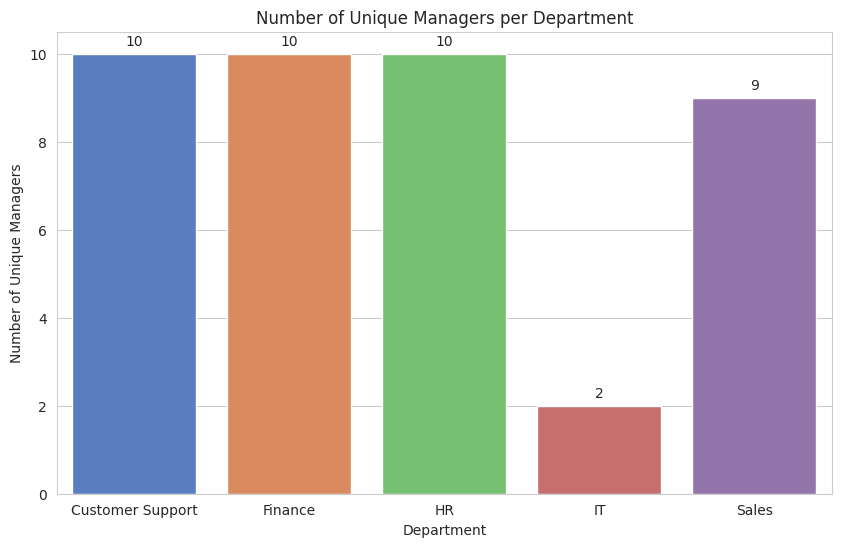

In [3]:
# Group by department and count unique managers
department_manager_counts = flag_data.groupby('department')['manager'].nunique().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='department', y='manager', data=department_manager_counts, palette="muted")

# Add title and labels to the plot
plt.title('Number of Unique Managers per Department')
plt.xlabel('Department')
plt.ylabel('Number of Unique Managers')

# Optional: add the exact number on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [4]:

{
    "data_type": "descriptive",
    "insight": "There is a disparity in Managerial Distribution across departments",
    "insight_value": {
        "description": "The IT department is markedly understaffed in terms of managerial positions, having only 2 managers, whereas departments such as Sales, Customer Support, Finance, and HR each have 10 managers. This significant discrepancy may indicate potential challenges in leadership distribution and workload management within the IT department."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Unique Managers per Department",
        "x_axis": {
            "name": "Department",
            "value": ["IT", "Sales", "Customer Support", "Finance", "HR"],
            "description": "This axis categorizes the company's departments to show the number of managers responsible for each."
        },
        "y_axis": {
            "name": "Number of Managers",
            "value": "[2, 9, 10, 10, 10]",
            "description": "This axis displays the number of unique managers in each department, highlighting the disparities in managerial staffing."
        },
        "description": "The bar chart illustrates a stark contrast in the number of managers between the IT department and other departments. While IT has only 2 managers, other departments such as Sales, Customer Support, Finance, and HR are significantly better staffed, each with 10 managers."
    },
    "question": "How does the number of managers and their distribution across departments affect operational effectiveness?",
    "actionable_insight": {
        "description": "Given the low number of managers in the IT department, it is crucial for the organization to assess the impact of this disparity on the department's operational effectiveness, employee satisfaction, and overall workload distribution. The organization should consider either redistributing existing managerial resources or hiring additional managers in the IT department to balance leadership roles more evenly across departments. This adjustment could improve decision-making speed, team supervision, and resource allocation."
    }
}


{'data_type': 'descriptive',
 'insight': 'There is a disparity in Managerial Distribution across departments',
 'insight_value': {'description': 'The IT department is markedly understaffed in terms of managerial positions, having only 2 managers, whereas departments such as Sales, Customer Support, Finance, and HR each have 10 managers. This significant discrepancy may indicate potential challenges in leadership distribution and workload management within the IT department.'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Unique Managers per Department',
  'x_axis': {'name': 'Department',
   'value': ['IT', 'Sales', 'Customer Support', 'Finance', 'HR'],
   'description': "This axis categorizes the company's departments to show the number of managers responsible for each."},
  'y_axis': {'name': 'Number of Managers',
   'value': '[2, 9, 10, 10, 10]',
   'description': 'This axis displays the number of unique managers in each department, highlighting the disparities in managerial s

### **Question 2:  What is the distribution of reportees in the IT department compare to other departments?**


#### Average Number of Reportees per Manager by Department

This chart illustrates the average number of reportees managed by each manager within different departments. A higher average suggests a heavier managerial workload. This analysis is importnat for assessing the distribution of managerial responsibilities and identifying departments that may require staffing adjustments etc.


/tmp/ipykernel_15034/2927389314.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='department', y='num_reportees', data=avg_reportees_per_manager, palette="muted")


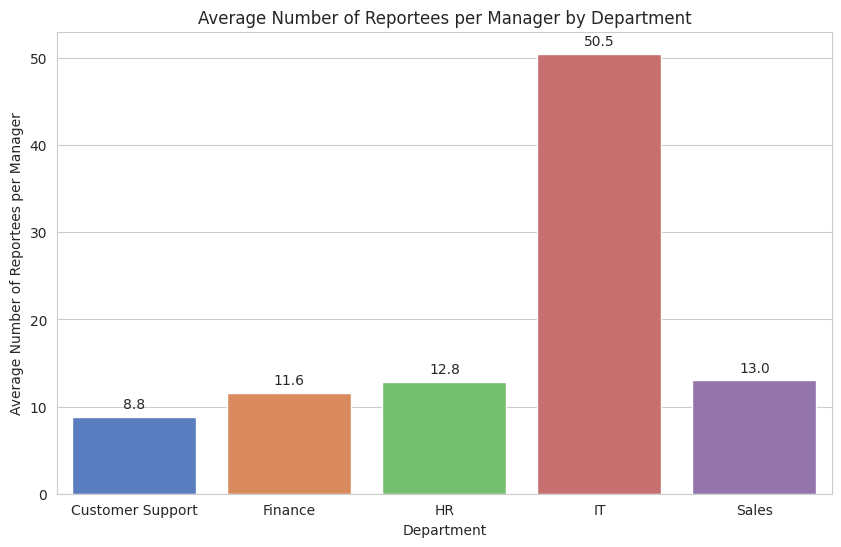

In [5]:
# Group by department and manager, and count the number of employees per manager
reportees_per_manager = flag_data.groupby(['department', 'manager']).size().reset_index(name='num_reportees')

# Calculate the average number of reportees per manager for each department
avg_reportees_per_manager = reportees_per_manager.groupby('department')['num_reportees'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='department', y='num_reportees', data=avg_reportees_per_manager, palette="muted")

# Add title and labels to the plot
plt.title('Average Number of Reportees per Manager by Department')
plt.xlabel('Department')
plt.ylabel('Average Number of Reportees per Manager')

# Optional: add the exact number on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Show the plot
plt.show()


#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "analytical",
    "insight": "There is a disproportionate high number of reportees per manager in the IT Department",
    "insight_value": {
        "description": "The average number of reportees per manager in the IT department is significantly higher at 50.5 compared to other departments. This is a stark contrast to Customer Support with 8.8, Finance with 11.6, HR with 12.8, and Sales with 13.0."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Average Number of Reportees per Manager by Department",
        "x_axis": {
            "name": "Department",
            "value": ["IT", "Customer Support", "Finance", "HR", "Sales"],
            "description": "This axis lists the departments to compare the average number of reportees managed in each."
        },
        "y_axis": {
            "name": "Average Number of Reportees",
            "value": "[50.5, 8.8, 11.6, 12.8, 13.0]",
            "description": "This axis displays the average number of reportees per manager in each department, highlighting the discrepancy in workload distribution."
        },
        "description": "The bar chart vividly illustrates the disparity in the distribution of reportees per manager across departments, with the IT department notably overwhelmed compared to others. This discrepancy could be indicative of potential management and operational inefficiencies within the IT department."
    },
    "question": "What is the distribution of reportees in the IT department compared to other departments?",
    "actionable_insight": {
        "description": "Considering the high average number of reportees per manager in the IT department, it is advisable for the organization to reevaluate its staffing and managerial distribution strategies. Possible actions include hiring more managers within the IT department to reduce the current manager's workload, thereby potentially increasing oversight and improving management effectiveness. Additionally, the organization might explore restructuring or introducing more supportive roles to alleviate the burden on existing managers, ensuring a more equitable distribution of reportees and enhancing overall departmental performance."
    }
}


{'data_type': 'analytical',
 'insight': 'There is a disproportionate high number of reportees per manager in the IT Department',
 'insight_value': {'description': 'The average number of reportees per manager in the IT department is significantly higher at 50.5 compared to other departments. This is a stark contrast to Customer Support with 8.8, Finance with 11.6, HR with 12.8, and Sales with 13.0.'},
 'plot': {'plot_type': 'bar',
  'title': 'Average Number of Reportees per Manager by Department',
  'x_axis': {'name': 'Department',
   'value': ['IT', 'Customer Support', 'Finance', 'HR', 'Sales'],
   'description': 'This axis lists the departments to compare the average number of reportees managed in each.'},
  'y_axis': {'name': 'Average Number of Reportees',
   'value': '[50.5, 8.8, 11.6, 12.8, 13.0]',
   'description': 'This axis displays the average number of reportees per manager in each department, highlighting the discrepancy in workload distribution.'},
  'description': 'The bar 

### **Question 3:  Who are the managers with the highest number of reportees?**

#### Number of Reportees for Managers in IT Department

This bar plot shows the distribution of reportees among managers within the IT department. Highlighting number of individuals managed by each manager, the chart underscores any imbalances that perhaps may exist. Particularly, this chart is integral in identifying managers, who might be handling a disproportionately high number of reportees compared to peers. 

/tmp/ipykernel_15034/3070314287.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='manager', y='num_reportees', data=reportees_per_manager, palette="muted")


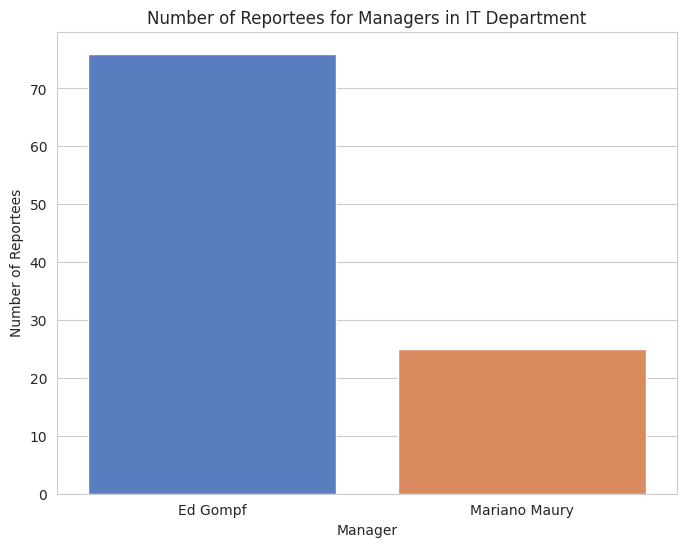

In [7]:
# Filter the data for the IT department
it_department_data = flag_data[flag_data['department'] == 'IT']

# Group by manager and count the number of reportees
reportees_per_manager = it_department_data.groupby('manager').size().reset_index(name='num_reportees')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='manager', y='num_reportees', data=reportees_per_manager, palette="muted")

# Add title and labels to the plot
plt.title('Number of Reportees for Managers in IT Department')
plt.xlabel('Manager')
plt.ylabel('Number of Reportees')

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "diagnostic",
    "insight": "There is a significant disparity among managers in terms of reportee numbers",
    "insight_value": {
        "description": "Within the IT department, there is a notable disparity in the distribution of reportees among managers. Ed Gompf manages a significantly higher number of reportees, totaling 76, which starkly contrasts with Mariano Mauray, who oversees 25 reportees."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Number of Reportees per Manager in IT Department",
        "x_axis": {
            "name": "Manager",
            "value": ["Ed Gompf", "Mariano Mauray"],
            "description": "This axis lists the managers within the IT department who have the highest number of reportees."
        },
        "y_axis": {
            "name": "Number of Reportees",
            "value": "[76, 25]",
            "description": "This axis displays the number of reportees managed by each of the specified managers, highlighting the unequal workload distribution."
        },
        "description": "The bar chart clearly shows the significant burden on Ed Gompf compared to other managers within the same department, raising concerns about potential overburden and the need for more balanced management responsibilities."
    },
    "question": "Who are the managers with the highest number of reportees?",
    "actionable_insight": {
        "description": "The disparity in reportee distribution within the IT department suggests a need for reassessment of managerial assignments and potential restructuring. The organization should consider redistributing reportees more evenly among existing managers or hiring additional managerial staff to alleviate the burden on Ed Gompf. Such adjustments would not only promote fairness and potentially enhance employee satisfaction but also ensure that leadership responsibilities are more manageable, which could improve decision-making and team dynamics."
    }
}


{'data_type': 'diagnostic',
 'insight': 'There is a significant disparity among managers in terms of reportee numbers',
 'insight_value': {'description': 'Within the IT department, there is a notable disparity in the distribution of reportees among managers. Ed Gompf manages a significantly higher number of reportees, totaling 76, which starkly contrasts with Mariano Mauray, who oversees 25 reportees.'},
 'plot': {'plot_type': 'bar',
  'title': 'Number of Reportees per Manager in IT Department',
  'x_axis': {'name': 'Manager',
   'value': ['Ed Gompf', 'Mariano Mauray'],
   'description': 'This axis lists the managers within the IT department who have the highest number of reportees.'},
  'y_axis': {'name': 'Number of Reportees',
   'value': '[76, 25]',
   'description': 'This axis displays the number of reportees managed by each of the specified managers, highlighting the unequal workload distribution.'},
  'description': 'The bar chart clearly shows the significant burden on Ed Gompf 

### **Question 4: What strategic changes can be made to improve managerial distribution and enhance departmental staffing?**


The current distribution of managers and reportees within the IT department highlights significant imbalances that could impact departmental effectiveness and employee morale.

To address the uneven managerial load and enhance operational effectiveness in the IT department, the organization should consider the following strategic changes: 1. Conduct a thorough review of current workload and managerial capacity to identify imbalances and potential areas of overload. 2. Implement a more equitable distribution of reportees among existing managers by reassigning team members based on current workload assessments. 3. Increase the number of managerial positions within the IT department to ensure a more manageable span of control and provide better support and oversight. 4. Offer leadership development programs to existing senior team members to prepare them for managerial roles, expanding the leadership base within the department. 5. Explore the use of technology and automation to reduce administrative burdens on managers, allowing them to focus more on leadership and strategic tasks. 6. Regularly monitor the effects of these changes on departmental performance and employee satisfaction to make further adjustments as necessary.

### Summary of Findings (Flag 27)


1. **Managerial Disparity**: This dataset provides an analysis of the management structure within the IT department, highlighting a significant lack of managerial positions compared to other departments. It focuses on the number of managers and their distribution of reportees.
   
2. **Reportee Distribution**: It has been observed that the IT department is markedly understaffed in terms of managerial positions, with an average of 50.5 reportees per manager, which is considerably higher than in other departments. This raises concerns about workload distribution and managerial effectiveness.
   
3. **Individual Manager Analysis**: The dataset reveals a disparity within the IT department itself, where a manager named Ed Gompf handles a disproportionately high number of reportees, indicating potential issues in management workload and equity.